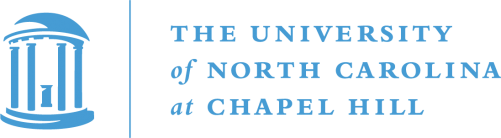


# Notebook 02
**Course:** *Econ 590, Computational Methods for Economists*, [University of North Carolina at Chapel Hill](https://econ.unc.edu/), Spring 2025  
**Instructor:** [Marlon Azinovic-Yang](https://sites.google.com/view/marlonazinovic/home)  
**Contact:** marlonay@unc.edu  
**References:** This notebook has benefited greatly from the teaching material and notebooks generously made available by [Simon Scheidegger](https://sites.google.com/site/simonscheidegger/home), [Felix Kubler](https://sites.google.com/site/fkubler/), [Harold Linh Cole](https://economics.sas.upenn.edu/people/harold-l-cole), [Jeremy Greenwood](https://www.jeremygreenwood.net/), [Jeppe Druedahl](https://sites.google.com/view/jeppe-druedahl/), [Rick Evans](https://sites.google.com/site/rickecon/), and by [Tom Sargent](http://www.tomsargent.com/) and [John Stachurski](https://johnstachurski.net/) on [QuantEcon](https://quantecon.org/).

## Content
The goal of this notebook is to introduce functions in Python. Functions are blocks of reusable code that perform specific tasks. Functions help organize code, make it more readable, and allow you to execute the same logic multiple times without rewriting it. Functions are key for writing **maintanable and reusable code**. Whenever you find yourself copy-pasting the same lines of code into different places, it is almost surely better to write a function for it (imagine you find a mistake in these lines of code later). 
### Defining functions
Let's start with the simplest example: let's say we want to have a function that receives two numbers and returns their sum. How can we do this in Python? 


In [7]:
def add(x, y):
    """
    Parameters:
    x (int or float): First number
    y (int or float): Second number
    
    Returns:
    int or float: Sum of the numbers
    """
    output = x + y
    return output

# lets try it out
x = 1
y = 2
result = add(x, y)
print("result = ", result)

result =  3


This function is maybe not very useful because writing `add(x, y)` is not easier than just writing `x + y`, but imagine we have some more complicated code that we want to use many times, then calling the function may be more convenient then always writing out the full code.   
**Exercise**:  
Define an `add_int(x, y)` function that first convert the `x` and `y` to integers, then prints their values, prints the sum, and then returns the sum.

In [8]:
def add_int(x, y):
    x: int = x
    y: int = y

    print(x)
    print(y)
    
    output = x + y 
    return output

In [9]:
# Let's test it out
result = add_int(1.3, 1.99) # result should be 2
print("result = ", result)
print(" ")
result = add_int(1, 4) # result should be 5
print("result = ", result)
print(" ")
result = add_int("1", "4") # result should be 5
print("result = ", result)


1.3
1.99
result =  3.29
 
1
4
result =  5
 
1
4
result =  14


Functions do not necessarily need to have input or outputs.

In [1]:
def say_hi():
    print("Hi Econ 590!")
    return

def say_what():
    print("what?")
    return

In [7]:
say_hi()
say_what()
say_hi()

Hi Econ 590!
what?
Hi Econ 590!


Some functions are already available in Python, such as `max`, `min` or the `print` and `type` functions we have been using.

In [8]:
print(max(3,4))
print(max(3,4,5,6))
print(min(3,4,5,6))


4
6
3


### Keyword arguments
There are two types of function arguments: *positional arguments*, which we have seen so far. They have to be provided and their order matters. Then there are *keyword arguments*, which have default values and are provided by specifying the keyword. Let's write a function that prints a `greeting` to a `person`. If a greetings and a person are provided, we want to use it, if not we want the greeting to default to `"Hi"` and the person to default to `"Econ 590"`. 

In [9]:
def print_greeting(greeting = "Hi", name = "Econ 590"):
    print(greeting, name)
    return

In [10]:
#run it without inputs
print_greeting()
# specify the inputs
print_greeting(greeting = "Good morning", name = "America")
# specify only one input
print_greeting(name = "America")
print_greeting(greeting = "Good morning")
# reversing the order of inputs
print_greeting(name = "America", greeting = "Good morning")

Hi Econ 590
Good morning America
Hi America
Good morning Econ 590
Good morning America


Keyword arguments can be mixed with positional arguments. In this case the positional arguments always have to come first. Let's say we want to print a greeting where the name always has to be provided, and only the greeting has a default value.

In [11]:
def print_greeting(name, greeting = "Hi"):
    print(greeting, name)
    return

In [12]:
# this works
print_greeting("Econ 590")
# this works
print_greeting("Econ 590", greeting = "Good evening")
# this does not work
print_greeting()



Hi Econ 590
Good evening Econ 590


TypeError: print_greeting() missing 1 required positional argument: 'name'

**Exercise**:   
A common utility function in economics is *constant relative risk aversion utility*, which is of the form: 
$$u(c) = \frac{c ^ {1 - \gamma}}{1 - \gamma}$$
where $c$ denotes consumption and $\gamma$ denotes the coefficient of relative risk aversion.
Define a function `util(c, gamma)` which takes consumption and the coefficient of relative risk aversion and returns the corresponding utility. If no value is provided, $\gamma$ should be assigned a default value of 5.

In [12]:
def util(c, gamma = 5):
    output  = (c ** (1-gamma))/(1-gamma)
    return output

In [14]:
# Test
print("util(1, 2) = ", util(1, 2)) # should return -1.
print("util(2, 2) = ", util(2, 2)) # should return -0.5
print("util(2, gamma = 4) = ", util(2, gamma = 4)) # should return -0.041666666666666664
print("util(2, gamma = 5) = ", util(2, gamma = 5)) # should return -0.015625
print("util(2) = ", util(2)) # should return -0.015625



util(1, 2) =  -1.0
util(2, 2) =  -0.5
util(2, gamma = 4) =  -0.041666666666666664
util(2, gamma = 5) =  -0.015625
util(2) =  -0.015625


### Local and global scope of variables
In Python, the scope of a variable refers to where in the program that variable can be accessed or modified. There are two main types of scope:

1. **Local Scope**: A variable declared inside a function is local to that function and cannot be accessed outside of it.
2. **Global Scope**: A variable declared outside of any function is global and can be accessed from anywhere in the program.
When a function is called, Python first looks for variables in the local scope. If it doesn’t find the variable, it checks the global scope.  

Let's look at an example:

In [16]:
x = 10  

def my_function():
    x = 5  # Local variable (only inside the function)
    print("Inside function:", x)  # This will print 5

# Calling the function
my_function()

Inside function: 5


Why is this helpful?

**Exercise**: What will `print(x)` show?

In [15]:
print(x)

1


In [17]:
x = 10  

def my_function2():
    print("Inside function:", x)  # This will print 5

# Calling the function
my_function2()

Inside function: 10


**Exercise**: What will `print(x)` show?

In [18]:
print(x)

10


In [19]:
def my_function3():
    aaa = 5  # Local variable (only inside the function)
    print("Inside function: aaa  = ", aaa)  # This will print 5

# Calling the function
my_function3()

Inside function: aaa  =  5


**Exercise**: What will `print(aaa)` show? Why?

In [ ]:
# Print aaa outside the function will give an error becuase it is a local variable called at the global level

What if we want to modify a variable defined outside the function inside the function? **NOT RECOMMENDED, BAD STYLE**.

In [20]:
x = 10  # Global variable

def increase_x():
    global x  # Declare that we are modifying the global variable
    x = x + 1
    print("Inside function:", x)

increase_x()

print("Outside function:", x)  

Inside function: 11
Outside function: 11


In [21]:
increase_x()
increase_x()
increase_x()
increase_x()

Inside function: 12
Inside function: 13
Inside function: 14
Inside function: 15


In [22]:
print("Outside function:", x)  

Outside function: 15


### Multiple return values
Functions can have multiple return values. For example we can write a function that returns the sum, difference, product and quotient of two inputs `x` and `y`.

In [23]:
def calculate(a, b):
    sum = a + b
    diff = a - b
    prod = a * b
    quot = a / b
    return sum, diff, prod, quot

In [24]:
a = 3
b = 5
sum, diff, prod, quot = calculate(a, b)
print("sum = ", sum)
print("diff = ", diff)
print("prod = ", prod)
print("quot = ", quot)


sum =  8
diff =  -2
prod =  15
quot =  0.6


### Functions of functions
Functions are Python objects (more on objects later). They can be assigned to variables and be an input to other functions. Let's make an example where we want to apply a given function `f` to inputs `x`, `y`, and `z`. We name the funcyion `apply_to_xyz`, it takes `f`, `x`, `y`, and `z` as input and returns `f(x)`, `f(y)`, and `f(z)`.

In [25]:
def apply_to_xyz(f, x, y, z):
    return f(x), f(y), f(z)

In [26]:
print("type: ", type(apply_to_xyz))
print("place in memory: ", id(apply_to_xyz))

import sys # need to import sys to use getsizeof
print("size in memory: ", sys.getsizeof(apply_to_xyz), "bytes")

type:  <class 'function'>
place in memory:  4610739232
size in memory:  160 bytes


**Exercise**:  
Define a function `identity(x)` that returns `x`, a function `square(x)` that returns $x^2$, and a function `smaller_than_2(x)` that returns whether `x` is strictly smaller than 2. Use the function `apply_to_xyz` to apply each of these functions to `x = 1.`, `y = 2.`, and `z = 3.`.  

In [28]:
def identity(x):
    return x
def square(x):
    return x ** 2
def smaller_than_10(x):
    return x < 2
    
x = 1
y = 2
z = 3

print(apply_to_xyz(identity, x, y, z))
print(apply_to_xyz(square, x, y, z))
print(apply_to_xyz(smaller_than_10, x, y, z))

(1, 2, 3)
(1, 4, 9)
(True, False, False)


### Recursive functions
Functions can even call themselves. Let's write a countdown function in a recursive way. To do that we will use an `if` statement, more on conditionals will come later.

In [28]:
def print_countdown(counter):
    # if counter is greater than 0
    if counter > 0:
        # we print the counter
        print(counter)
        # and call the function again with counter - 1
        print_countdown(counter - 1)
    else:
        # if counter is not greater than 0, we print "go!"
        print("go!")
    return
    

In [29]:
print_countdown(5)

5
4
3
2
1
go!


### Anonymous functions
We can also define so called *anonymous functions* which are sometimes also called *lambda functions*. For example, the following two are equivalent:


In [30]:
def square_v1(x):
    return x ** 2

square_v2 = lambda x: x ** 2

print(square_v1(3.))
print(square_v2(3.))

9.0
9.0


In this case, the first version is preferred for clarity. Lambda functions can be helpful if we don't even want to give the function a name (hence anonymous) and are meant for very simple functions that execute a single expression and are only used temporarily.   
**Exercise**:  
Use anonymous functions together with `apply_to_xyz` to apply the `identity`, `square` and `smaller_than_2` functions to `x`, `y`, and `z`. 

In [31]:
#TODO

### Best practices
There are some best practices for functions.
1. **Informative names**: a function that adds `a` and `b` is much more useful when it's called `add_numbers(a, b)` rathe than `f(a, b)`. You will see it in other parts of the code and if it says `f(a,b)` we have no idea what's happening.
2. **Keep functions short and focused on a single task**: this makes it much more easy to debug and to reuse the functions efficiently.
3. **Use docstrings**: as soon as a function is a little more complicated, it is very important that you provide a description about what the inputs and outputs are and what the function does. This is true not only for your collaborators, but also for your future self. I never remember as much as I think I will. Docstrings will also be returned for the help function.

In [32]:
def add_numbers(a, b):
    """
    Adds two numbers and returns the result.
    
    Parameters:
    a (int or float): First number
    b (int or float): Second number
    
    Returns:
    int or float: Sum of the numbers
    """
    return a + b

In [33]:
? add_numbers

Signature:  add_numbers(a, b)
Docstring:
Adds two numbers and returns the result.

Parameters:
a (int or float): First number
b (int or float): Second number

Returns:
int or float: Sum of the numbers
File:      /tmp/ipykernel_121126/1691502676.py
Type:      function
